In [20]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets

In [79]:
class LinearRegression:
    def __init__(self, X, y):
        self.X = X
        (self._m, self._n) = X.shape

        self.y = y.reshape((self._m, 1))

        # Determine minimum of cost function using the normal
        # equation. We will use this as a benchmark for gradient
        # descent.
        self.min_theta = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.y)
    
    def cost(self, thetas):
        err = self.X.dot(thetas) - self.y
        return 1.0/(2 * self._m) * err.T.dot(err)
    
    def cost_grad(self, thetas):
        err = self.X.dot(thetas) - self.y
        return 1.0/self._m * self.X.T.dot(err)

    def grad_descent(self, theta0, alpha, max_iter=100, tol=1e-5):
        theta = theta0
        self.gd_steps = [theta0]

        iter_ = 1 # variable to keep track of number of iteration
        while iter_ <= max_iter:
            # Gradient descent update
            theta_new = theta - alpha * self.cost_grad(theta)
            
            if abs(theta_new - theta).max() < tol:
                break
            else:
                theta = theta_new
            
            # Update number of iterations
            iter_ = iter_ + 1
            self.gd_steps.append(theta)    
        
    def plot(self, save_to):
        """Plots function and gradient descent steps as arrows.
        
        Args:
            min_theta (numpy.ndarray): minimum of function.
            save_to (str): path to save plot to.
        """
        plt.clf()
        
        # Plot contours of cost function
        start_to_end = np.linalg.norm(self.min_theta - self.gd_steps[0])
        grid_size = 100
        # Generate grid of points for which we want to
        # evaluate the cost function
        theta1, theta2 = np.meshgrid(
            np.linspace(
                self.min_theta[0,0] - start_to_end,
                self.min_theta[0,0] + start_to_end,
                grid_size
            ),
            np.linspace(
                self.min_theta[1,0] - start_to_end,
                self.min_theta[1,0] + start_to_end,
                grid_size
            )
        )
        # Apply function to grid points
        cost_grid = np.array(
            [self.cost(np.array(c).reshape((self._n, 1))) for c in zip(theta1.flat, theta2.flat)]
        ).reshape(theta1.shape)
        # Plot contours
        cs = plt.contour(theta1, theta2, cost_grid, 10)
        
        # Plot starting point
        plt.plot(*self.gd_steps[0], color='r', marker='o', markersize=6)
        
        # Plot gradient descent steps as arrow
        for (start, end) in zip(self.gd_steps[:-1], self.gd_steps[1:]):
            arrow = np.concatenate([start, end - start])
            plt.quiver(*arrow, color='r', angles='xy', scale_units='xy', scale=1)
        
        # Plot minimum
        plt.plot(*self.min_theta, color='g', marker='o', markersize=6)

        # Save plot
        plt.clabel(cs, inline=1, fontsize=10, fmt='%1.0f')
        plt.legend()
        plt.xlabel(r'$\theta_1$')
        plt.ylabel(r'$\theta_2$')
        plt.savefig(save_to)

In [3]:
ds = datasets.load_boston()
print(ds.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [58]:
X = ds.data[:, np.where((ds.feature_names == "ZN") | (ds.feature_names == "INDUS"))[0]]
X

array([[18.  ,  2.31],
       [ 0.  ,  7.07],
       [ 0.  ,  7.07],
       ...,
       [ 0.  , 11.93],
       [ 0.  , 11.93],
       [ 0.  , 11.93]])

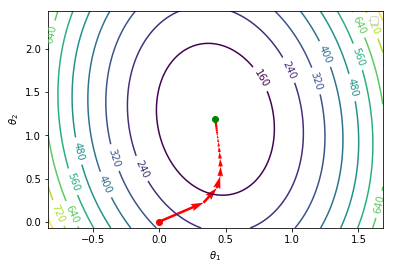

In [80]:
lr = LinearRegression(X, ds.target)
lr.grad_descent(np.zeros((n, 1)), 0.001)
lr.plot("sdfsdf.pdf")

In [78]:
np.linalg.norm(lr.min_theta - lr.gd_steps[0])

1.2602810652750345

In [55]:
ds.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [45]:
min_theta1 = -1
max_theta1 = 1
domain = np.linspace(min_theta1, max_theta1, 2)
theta1, theta2 = np.meshgrid(domain, domain)
# Apply function to grid points
cost_grid = np.array(
    [lr.cost(np.array(c).reshape((lr._n, 1))) for c in zip(theta1.flat, theta2.flat)]
).reshape(theta1.shape)

In [46]:
cost_grid

array([[5525.01961462, 1096.64277668],
       [3622.87218379, 2260.09376482]])

In [ ]:
np.no